# Starbucks regression project

importing important libraries 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from io import StringIO
import csv
############################################
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
############################################
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
############################################
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

get the data from mraket watch 

In [2]:
data_sbux=pd.DataFrame()
############################################
url1='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2016%2000:00:00&enddate=01/01/2017%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url1)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url2='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2017%2000:00:00&enddate=01/01/2018%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url2)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url3='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2018%2000:00:00&enddate=01/01/2019%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url3)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url4='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2019%2000:00:00&enddate=01/01/2020%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url4)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url5='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2021%2000:00:00&enddate=12/06/2021%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url5)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################

print(data_sbux)
data_sbux

               0       1       2       3       4          5
0           Date    Open    High     Low   Close     Volume
1     12/30/2016   56.28   56.45   55.40   55.52  8,344,508
2     12/29/2016   56.35   56.47   56.14   56.32  3,781,721
3     12/28/2016   56.80   56.90   56.25   56.35  5,548,726
4     12/27/2016   56.99   57.39   56.81   56.86  4,186,157
...          ...     ...     ...     ...     ...        ...
1240  01/08/2021  103.86  105.76  103.42  105.67  5,869,677
1241  01/07/2021  104.49  104.64  102.95  103.35  5,057,016
1242  01/06/2021  102.99  105.21  102.91  104.19  5,017,464
1243  01/05/2021  102.92  104.26  102.80  103.44  5,721,905
1244  01/04/2021  107.66  107.75  102.14  103.10  8,041,533

[1245 rows x 6 columns]


,0,1,2,3,4,5
0,Date,Open,High,Low,Close,Volume
1,12/30/2016,56.28,56.45,55.40,55.52,"8,344,508"
2,12/29/2016,56.35,56.47,56.14,56.32,"3,781,721"
3,12/28/2016,56.80,56.90,56.25,56.35,"5,548,726"
4,12/27/2016,56.99,57.39,56.81,56.86,"4,186,157"
...,...,...,...,...,...,...
1240,01/08/2021,103.86,105.76,103.42,105.67,"5,869,677"
1241,01/07/2021,104.49,104.64,102.95,103.35,"5,057,016"
1242,01/06/2021,102.99,105.21,102.91,104.19,"5,017,464"
1243,01/05/2021,102.92,104.26,102.80,103.44,"5,721,905"


clean the data and spliting them 

In [3]:
def cleanning(df):
    df=df.rename(columns = {0:'DATE',1:'OPEN',2:'HIGH',3:'LOW',4:'CLOSE',5:'VOLUME'}, inplace = False)
    df.drop(['OPEN','VOLUME','LOW','HIGH'],inplace=True,axis=1)
    df.drop(df.index[df['DATE'] == 'Date'], inplace = True)
    df.dropna(inplace=True)
    df.set_index('DATE',inplace=True)
    df.index = pd.to_datetime(df.index)
    df['CLOSE']=df['CLOSE'].astype(float)
    df.sort_index(inplace=True)
    return df

data_sbux=cleanning(data_sbux)
print(data_sbux)

n=int(len(data_sbux)*0.94)
m=int(n*0.1)

data_sbux_train=data_sbux[:n-m]
data_sbux_valid=data_sbux[n-m:n]
data_sbux_test=data_sbux[n:]

data_sbux

             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-11-30  109.64
2021-12-01  108.66
2021-12-02  111.42
2021-12-03  111.24
2021-12-06  113.36

[1240 rows x 1 columns]


,CLOSE
DATE,
2016-01-04,58.26
2016-01-05,58.65
2016-01-06,58.13
2016-01-07,56.69
2016-01-08,56.63
...,...
2021-11-30,109.64
2021-12-01,108.66
2021-12-02,111.42


In [4]:
print(data_sbux_train)
print(data_sbux_train.info())
print("##################################")
print(data_sbux_valid)
print(data_sbux_valid.info())
print("##################################")
print(data_sbux_test)
print(data_sbux_test.info())
print("##################################")


             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-03-01  106.87
2021-03-02  107.20
2021-03-03  106.22
2021-03-04  104.89
2021-03-05  105.20

[1049 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049 entries, 2016-01-04 to 2021-03-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   1049 non-null   float64
dtypes: float64(1)
memory usage: 16.4 KB
None
##################################
             CLOSE
DATE              
2021-03-08  105.03
2021-03-09  106.55
2021-03-10  107.78
2021-03-11  107.32
2021-03-12  107.81
...            ...
2021-08-13  116.76
2021-08-16  117.54
2021-08-17  116.57
2021-08-18  115.68
2021-08-19  114.32

[116 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2021-03-08 to 2021-08-19
Data columns (total 1 columns):
 #   Column  Non-N

In [5]:
print(data_sbux_train.info())
print("##################################")
print(data_sbux_valid.info())
print("##################################")
print(data_sbux_test.info())
print("##################################")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049 entries, 2016-01-04 to 2021-03-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   1049 non-null   float64
dtypes: float64(1)
memory usage: 16.4 KB
None
##################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2021-03-08 to 2021-08-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   116 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB
None
##################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2021-08-20 to 2021-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   75 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB
None
##################################


ploting the data sets

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

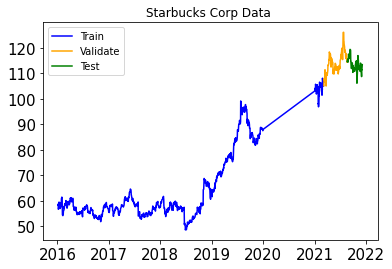

In [6]:
train = plt.plot(data_sbux_train, color='blue',label='Train')
validate = plt.plot(data_sbux_valid, color='orange', label='Validate')
test = plt.plot(data_sbux_test, color='green', label = 'Test')
plt.legend(loc='best')
plt.title('Starbucks Corp Data ')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

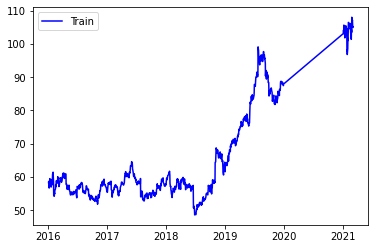

In [7]:
train = plt.plot(data_sbux_train, color='blue',label='Train')
plt.legend(loc='best')


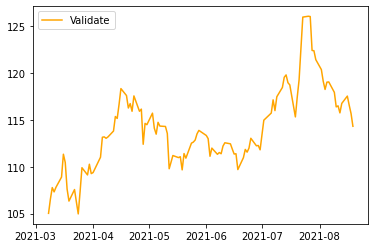

In [8]:
validate = plt.plot(data_sbux_valid, color='orange', label='Validate')
plt.legend(loc='best')


(array([18854., 18871., 18885., 18901., 18915., 18932., 18946., 18962.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

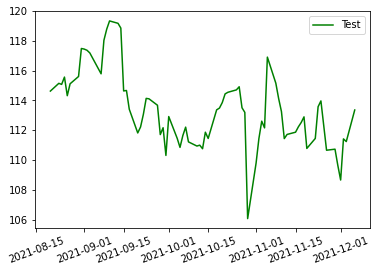

In [9]:
test = plt.plot(data_sbux_test, color='green', label = 'Test')
plt.legend(loc='best')
plt.xticks(rotation=20)

do the kpss, and dicky fuller 

In [10]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [11]:
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        pvalue = dftest[1]
        if pvalue < cutoff:
            print('p-value = %.4f. The series is likely stationary.' % pvalue)
        else:
            print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

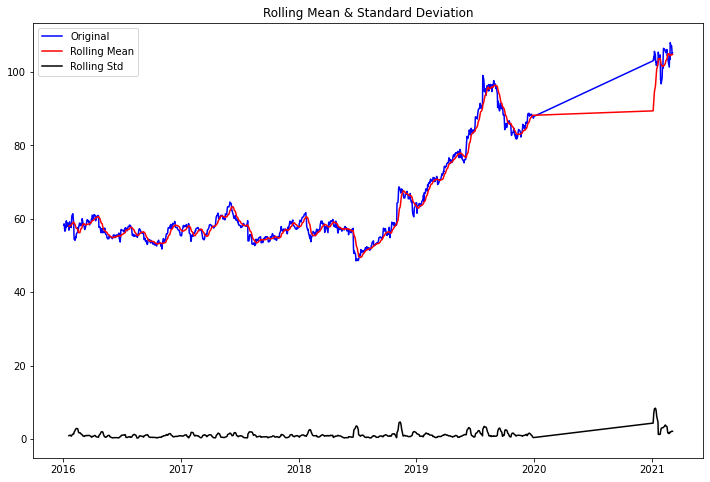

Results of Dickey-Fuller Test:
p-value = 0.9873. The series is likely non-stationary.
p-value = 0.9873. The series is likely non-stationary.
p-value = 0.9873. The series is likely non-stationary.
Test Statistic                    0.589318
p-value                           0.987349
#Lags Used                        0.000000
Number of Observations Used    1048.000000
Critical Value (1%)              -3.436605
Critical Value (5%)              -2.864302
Critical Value (10%)             -2.568240
dtype: float64


In [12]:
test_stationarity(data_sbux_train)

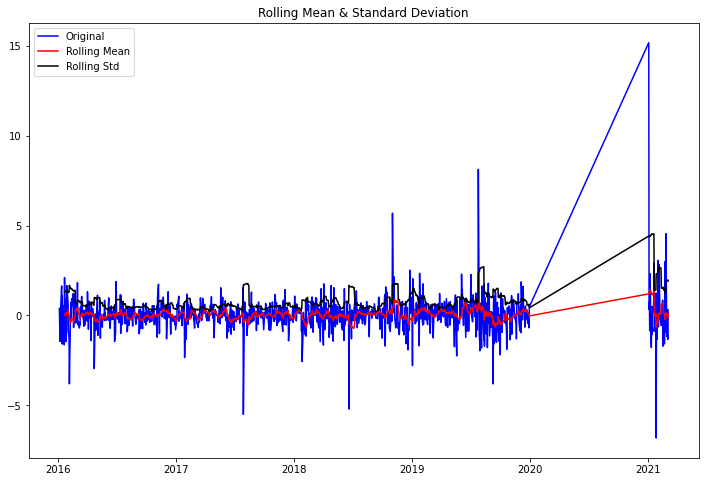

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -33.065994
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1047.000000
Critical Value (1%)              -3.436611
Critical Value (5%)              -2.864304
Critical Value (10%)             -2.568242
dtype: float64


In [13]:
new=data_sbux_train.diff()
new.dropna(inplace=True)
test_stationarity(new)

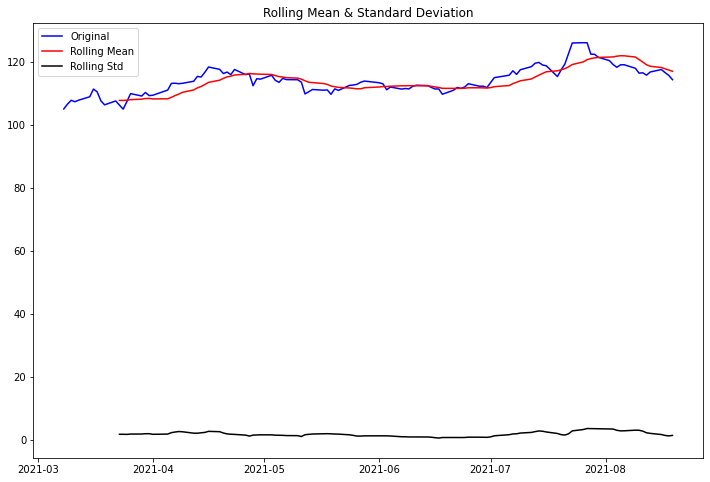

Results of Dickey-Fuller Test:
p-value = 0.2425. The series is likely non-stationary.
p-value = 0.2425. The series is likely non-stationary.
p-value = 0.2425. The series is likely non-stationary.
Test Statistic                  -2.104940
p-value                          0.242533
#Lags Used                       3.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


In [14]:
test_stationarity(data_sbux_valid)

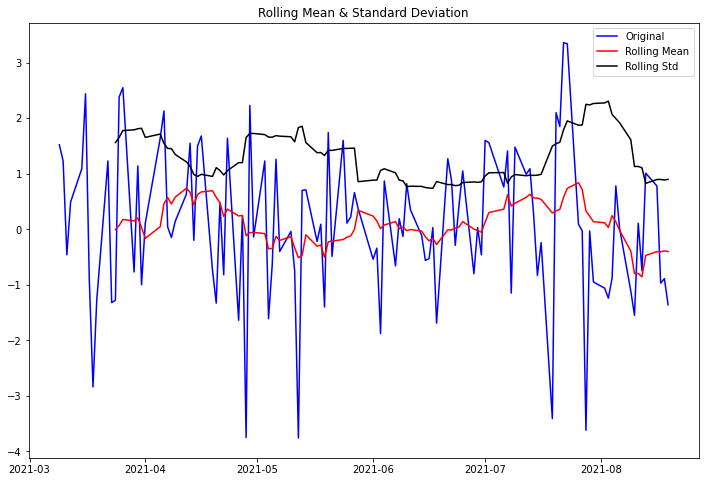

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.794482e+00
p-value                        2.319646e-09
#Lags Used                     2.000000e+00
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64


In [15]:
new=data_sbux_valid.diff()
new.dropna(inplace=True)
test_stationarity(new)

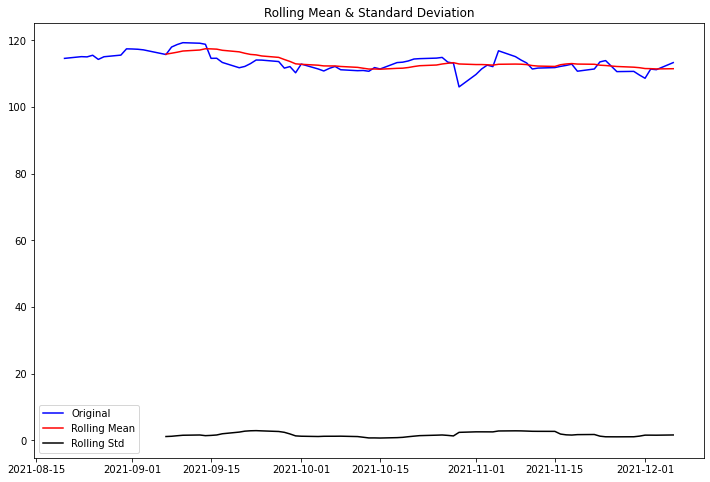

Results of Dickey-Fuller Test:
p-value = 0.0440. The series is likely non-stationary.
p-value = 0.0440. The series is likely non-stationary.
p-value = 0.0440. The series is likely non-stationary.
Test Statistic                 -2.911922
p-value                         0.043979
#Lags Used                      0.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [16]:
test_stationarity(data_sbux_test)

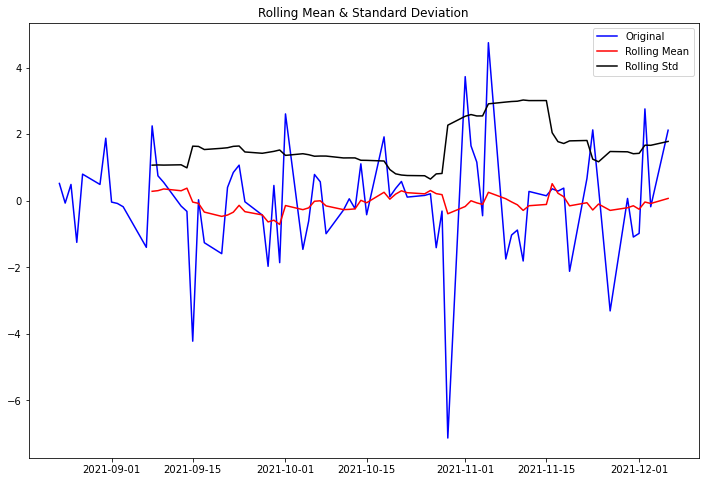

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.687526e+00
p-value                        8.213683e-07
#Lags Used                     4.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64


In [17]:
new=data_sbux_test.diff()
new.dropna(inplace=True)
test_stationarity(new)

In [18]:
kpss_test(data_sbux_train)

KPSS Statistic: 2.9571217204232645
p-value: 0.01
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [19]:
newk=data_sbux_train.diff()
newk.dropna(inplace=True)
kpss_test(newk)

KPSS Statistic: 0.431507361961094
p-value: 0.0635744129478043
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [20]:
kpss_test(data_sbux_valid)

KPSS Statistic: 0.5173908391396251
p-value: 0.037749811004588935
num lags: 13
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [21]:
newk=data_sbux_valid.diff()
newk.dropna(inplace=True)
kpss_test(newk)

KPSS Statistic: 0.1513871783989471
p-value: 0.1
num lags: 13
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [22]:
kpss_test(data_sbux_test)

KPSS Statistic: 0.42819787909069174
p-value: 0.06500091418504667
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [23]:
newk=data_sbux_test.diff()
newk.dropna(inplace=True)
kpss_test(newk)

KPSS Statistic: 0.09669057587375236
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


# trying different ARIMA models

# This is using AR and MA as 1    
1,1,1

In [24]:
model=ARIMA(data_sbux_train, order=(0,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)



0.04479007633587665
7.044982948054165


In [25]:
model=ARIMA(data_sbux_train, order=(1,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.050132327671955954
7.050818494265459


In [26]:
model=ARIMA(data_sbux_train, order=(0,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.04978568255635382
7.050114485297124


In [27]:
model=ARIMA(data_sbux_train, order=(1,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.05600379482858372
7.043124768971345


# This is using AR and MA as 2
2,1,2

In [28]:
model=ARIMA(data_sbux_train, order=(2,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.053267230971553614
7.069539081319782


In [29]:
model=ARIMA(data_sbux_train, order=(2,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.056460347372993866
7.044681949828316


In [30]:
model=ARIMA(data_sbux_train, order=(0,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.052873022614845694
7.069762369690411


In [31]:
model=ARIMA(data_sbux_train, order=(1,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.05648567362908474
7.044583453934798


In [32]:
model=ARIMA(data_sbux_train, order=(2,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.09343940612725077
7.041751447910158


# This is using AR and MA as 3  
2,1,3

In [33]:
model=ARIMA(data_sbux_train, order=(3,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.054752555748258394
7.0431444723146965


In [34]:
model=ARIMA(data_sbux_train, order=(3,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.05687987810591084
7.033076165977259


In [35]:
model=ARIMA(data_sbux_train, order=(3,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.09468151775246585
7.050267010468545


In [36]:
model=ARIMA(data_sbux_train, order=(0,1,3))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.053989728119666076
7.0425625606754405


In [37]:
model=ARIMA(data_sbux_train, order=(1,1,3))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.05716343803831466
7.030554184246705


In [38]:
model=ARIMA(data_sbux_train, order=(2,1,3))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.11438360582233079
6.385317308497374


# This is using AR and MA as 4  
2,1,4

In [39]:
model=ARIMA(data_sbux_train, order=(4,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.05495252371799414
7.0518242077719755


In [40]:
model=ARIMA(data_sbux_train, order=(4,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.05778759306025366
7.0487046656967225


In [41]:
model=ARIMA(data_sbux_train, order=(4,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.09366085631703897
7.216562265781087


In [42]:
model=ARIMA(data_sbux_train, order=(0,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.0540992236680812
7.052209773860519


In [43]:
model=ARIMA(data_sbux_train, order=(1,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.05881440793810124
7.053419873348092


In [44]:
model=ARIMA(data_sbux_train, order=(2,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.096605459925839
6.941709780979756


In [45]:
model=ARIMA(data_sbux_train, order=(3,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.09736141982535318
7.054495912047475


In [46]:
model=ARIMA(data_sbux_train, order=(4,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.10342737624013319
6.998321646997367


# This is using AR and MA as 5 
5,1,5

In [47]:
model=ARIMA(data_sbux_train, order=(5,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.08240256949243542
6.8870643693437525


In [48]:
model=ARIMA(data_sbux_train, order=(5,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.09968999026184518
6.962926551941178


In [49]:
model=ARIMA(data_sbux_train, order=(5,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.10798631184314934
6.905992359512159


In [50]:
model=ARIMA(data_sbux_train, order=(0,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.09072438677541236
6.8922589780456125


In [51]:
model=ARIMA(data_sbux_train, order=(1,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.10083709159025721
6.970409277867706


In [52]:
model=ARIMA(data_sbux_train, order=(2,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.10712351428329865
6.905196405644777


In [53]:
model=ARIMA(data_sbux_train, order=(5,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.15172715699321743
6.884117701137903


# Web Scrapping using beautiful soup

In [54]:
url='https://www.marketwatch.com/investing/stock/sbux/download-data?mod=mw_quote_tab'
website = requests.get(url)
soup = BeautifulSoup(website.text, 'html')



In [55]:
print(soup.find('thead',{ "class" : "table__head" }))

<thead class="table__head">
<tr class="table__row">
<th class="overflow__heading fixed--column">
<div class="cell__content fixed--cell">Date</div>
<div class="cell__content">Date</div>
</th>
<th class="overflow__heading"><div class="cell__content">Open</div></th>
<th class="overflow__heading"><div class="cell__content">High</div></th>
<th class="overflow__heading"><div class="cell__content">Low</div></th>
<th class="overflow__heading"><div class="cell__content">Close</div></th>
<th class="overflow__heading"><div class="cell__content">Volume</div></th>
</tr>
</thead>


In [56]:
print(soup.find('tbody',{ "class" : "table__body row-hover" }))

<tbody class="table__body row-hover">
<tr class="table__row">
<td class="overflow__cell fixed--column">
<div class="cell__content fixed--cell u-secondary">12/07/2021</div>
<div class="cell__content u-secondary">12/07/2021</div>
</td>
<td class="overflow__cell"><div class="cell__content">$115.06</div></td>
<td class="overflow__cell"><div class="cell__content">$117.19</div></td>
<td class="overflow__cell"><div class="cell__content">$114.79</div></td>
<td class="overflow__cell"><div class="cell__content">$116.26</div></td>
<td class="overflow__cell"><div class="cell__content">8,786,898</div></td>
</tr>
<tr class="table__row">
<td class="overflow__cell fixed--column">
<div class="cell__content fixed--cell u-secondary">12/06/2021</div>
<div class="cell__content u-secondary">12/06/2021</div>
</td>
<td class="overflow__cell"><div class="cell__content">$112.01</div></td>
<td class="overflow__cell"><div class="cell__content">$114.17</div></td>
<td class="overflow__cell"><div class="cell__conten

# The final result

using the best fit of ARIMA model (2,1,3) and repeating all the previous steps

             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-08-13  116.76
2021-08-16  117.54
2021-08-17  116.57
2021-08-18  115.68
2021-08-19  114.32

[1165 rows x 1 columns]
             CLOSE
DATE              
2021-08-20  114.63
2021-08-23  115.15
2021-08-24  115.08
2021-08-25  115.57
2021-08-26  114.32
...            ...
2021-11-30  109.64
2021-12-01  108.66
2021-12-02  111.42
2021-12-03  111.24
2021-12-06  113.36

[75 rows x 1 columns]


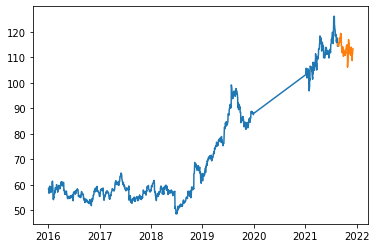

In [57]:
data_sbux_train_final=data_sbux[:n]
data_sbux_test_final=data_sbux[n:]
print(data_sbux_train_final)
print(data_sbux_test_final)
plt.plot(data_sbux_train_final)
plt.plot(data_sbux_test_final)

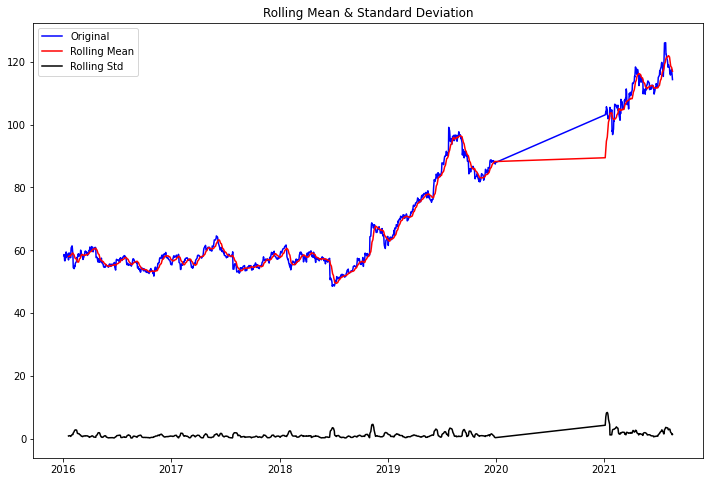

Results of Dickey-Fuller Test:
p-value = 0.9823. The series is likely non-stationary.
p-value = 0.9823. The series is likely non-stationary.
p-value = 0.9823. The series is likely non-stationary.
Test Statistic                    0.421892
p-value                           0.982295
#Lags Used                        0.000000
Number of Observations Used    1164.000000
Critical Value (1%)              -3.435980
Critical Value (5%)              -2.864026
Critical Value (10%)             -2.568094
dtype: float64


In [58]:
test_stationarity(data_sbux_train_final)

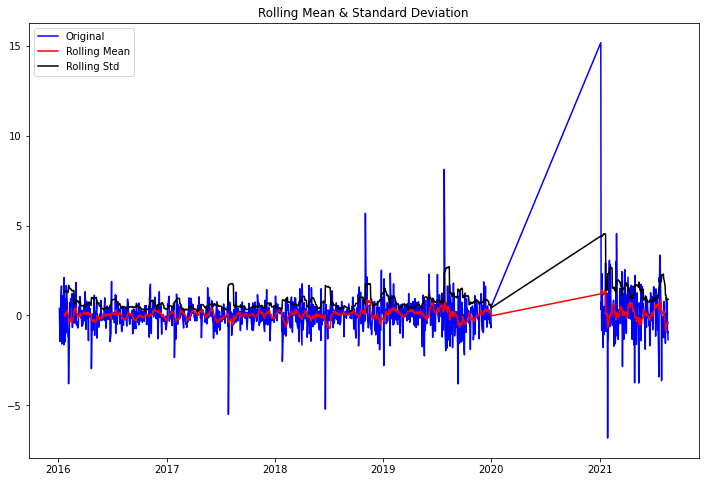

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.865105e+00
p-value                        1.447551e-14
#Lags Used                     1.500000e+01
Number of Observations Used    1.148000e+03
Critical Value (1%)           -3.436059e+00
Critical Value (5%)           -2.864061e+00
Critical Value (10%)          -2.568112e+00
dtype: float64


In [59]:
new=data_sbux_train_final.diff()
new.dropna(inplace=True)
test_stationarity(new)

In [60]:
kpss_test(data_sbux_train_final)

KPSS Statistic: 3.586684789377799
p-value: 0.01
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [61]:
new=data_sbux_train_final.diff()
new.dropna(inplace=True)
kpss_test(new)

KPSS Statistic: 0.38107034289947433
p-value: 0.08531450737091624
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


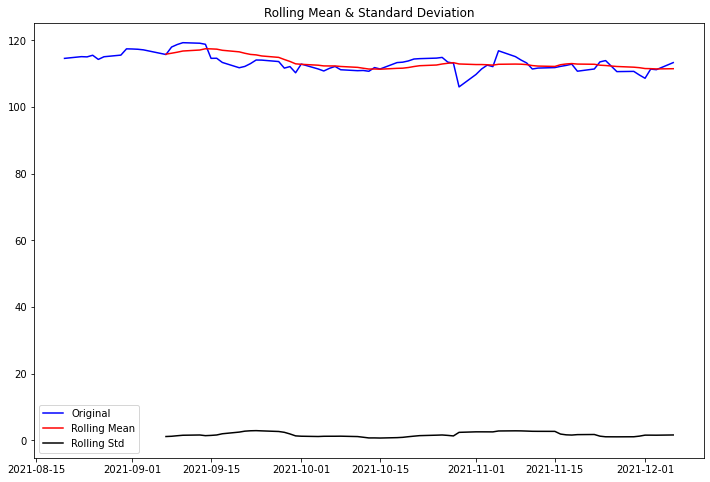

Results of Dickey-Fuller Test:
p-value = 0.0440. The series is likely non-stationary.
p-value = 0.0440. The series is likely non-stationary.
p-value = 0.0440. The series is likely non-stationary.
Test Statistic                 -2.911922
p-value                         0.043979
#Lags Used                      0.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [62]:
test_stationarity(data_sbux_test_final)

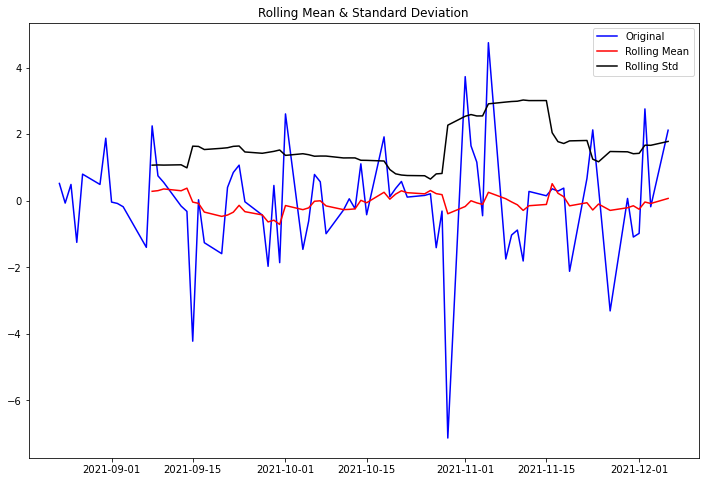

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.687526e+00
p-value                        8.213683e-07
#Lags Used                     4.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64


In [63]:
new=data_sbux_test_final.diff()
new.dropna(inplace=True)
test_stationarity(new)

In [64]:
kpss_test(data_sbux_test_final)

KPSS Statistic: 0.42819787909069174
p-value: 0.06500091418504667
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [65]:
new=data_sbux_test_final.diff()
new.dropna(inplace=True)
kpss_test(new)

KPSS Statistic: 0.09669057587375236
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [66]:
model_final=ARIMA(data_sbux_train_final, order=(2,1,3))
result_final=model_final.fit()
#print(result_final.summary())
############################################################
start=1
end=len(data_sbux_train_final)
pred_train= result_final.predict(start=start,end=end,typ='levels')
pred_train.index=data_sbux_train_final.index

print(pred_train)
print(data_sbux_train_final)
q=np.sqrt(metrics.mean_squared_error(data_sbux_train_final,pred_train))
print(q)

############################################################
start=len(data_sbux_train_final)
end=len(data_sbux_test_final)+len(data_sbux_train_final)-1
pred_test= result_final.predict(start=start,end=end,typ='levels')
pred_test.index=data_sbux_test_final.index
print(data_sbux_test_final)
print(pred_test)
a=np.sqrt(metrics.mean_squared_error(data_sbux_test_final,pred_test))
print(a)
z=data_sbux_test_final.mean()
print(z)

DATE
2016-01-04     58.308442
2016-01-05     58.695759
2016-01-06     58.185564
2016-01-07     56.741573
2016-01-08     56.664637
                 ...    
2021-08-13    116.601963
2021-08-16    117.393611
2021-08-17    116.498235
2021-08-18    115.670726
2021-08-19    114.411851
Length: 1165, dtype: float64
             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-08-13  116.76
2021-08-16  117.54
2021-08-17  116.57
2021-08-18  115.68
2021-08-19  114.32

[1165 rows x 1 columns]
0.11975507325705646
             CLOSE
DATE              
2021-08-20  114.63
2021-08-23  115.15
2021-08-24  115.08
2021-08-25  115.57
2021-08-26  114.32
...            ...
2021-11-30  109.64
2021-12-01  108.66
2021-12-02  111.42
2021-12-03  111.24
2021-12-06  113.36

[75 rows x 1 columns]
DATE
2021-08-20    114.411851
2021-08-23    114.572890
2021-08-24    114.814186
2021-08-25    115.079687
2021-08-26    115.308474

ploting the actual and predicted values 

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

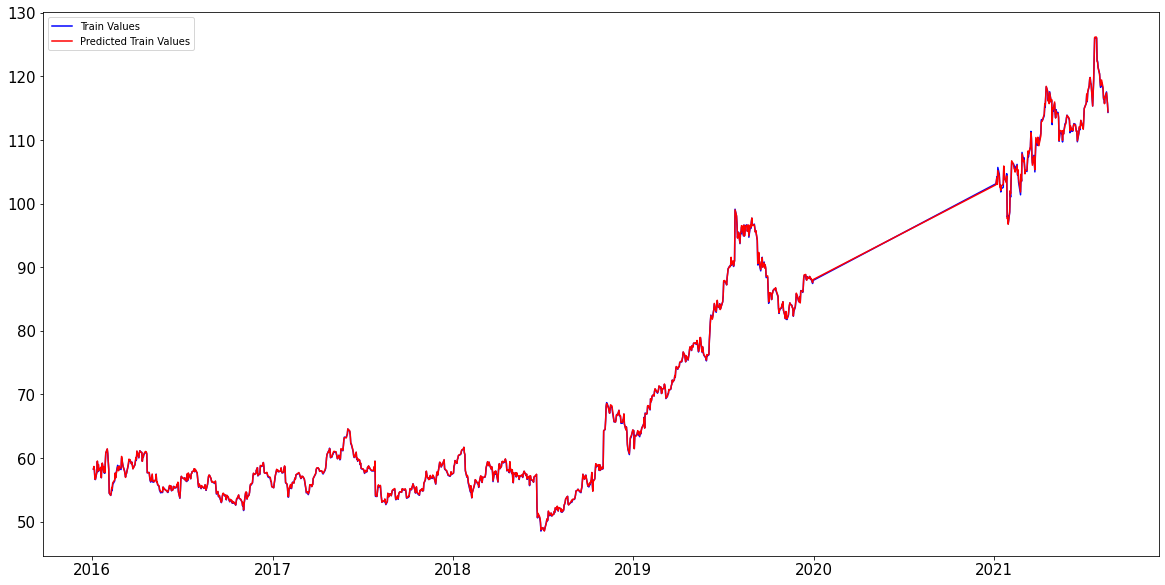

In [67]:
N=20
M=10
fig, ax = plt.subplots(figsize=(N, M))

actual = plt.plot(data_sbux_train_final, color='blue',label='Train Values')
predicted = plt.plot(pred_train, color='red',label='Predicted Train Values')

plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([104., 106., 108., 110., 112., 114., 116., 118., 120., 122.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

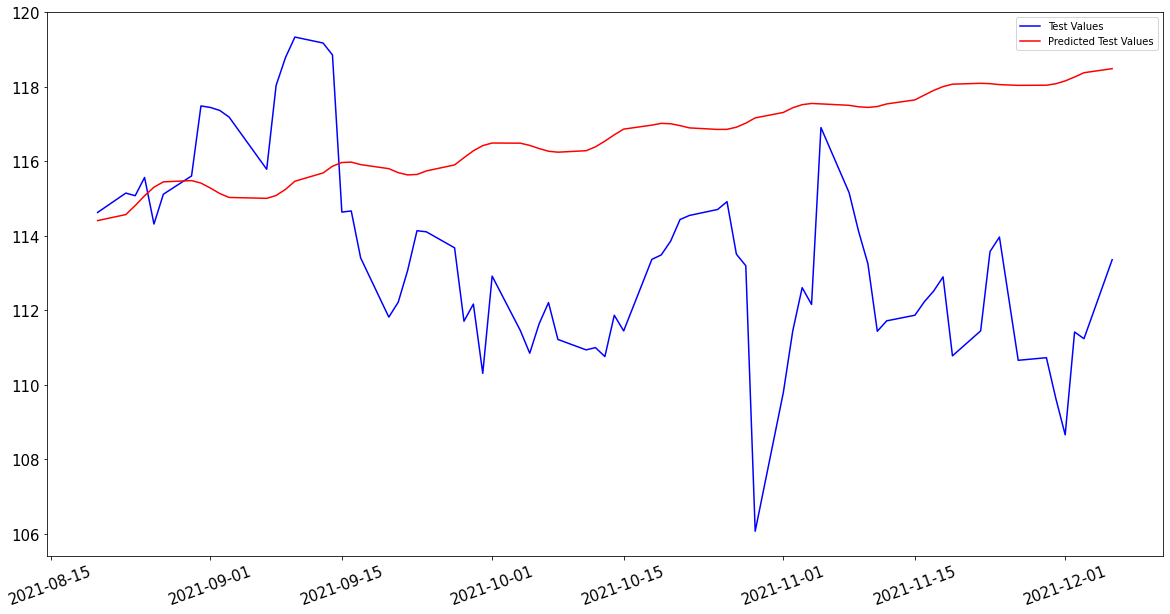

In [68]:
N=20
M=10
fig, ax = plt.subplots(figsize=(N, M))

actual = plt.plot(data_sbux_test_final, color='blue',label='Test Values')
predicted = plt.plot(pred_test, color='red',label='Predicted Test Values')

plt.legend(loc='best')
plt.xticks(fontsize=15,rotation=20)
plt.yticks(fontsize=15)

calculating the residual error 

             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-08-12  115.75
2021-08-13  116.76
2021-08-16  117.54
2021-08-17  116.57
2021-08-18  115.68

[1164 rows x 1 columns]
1164


(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

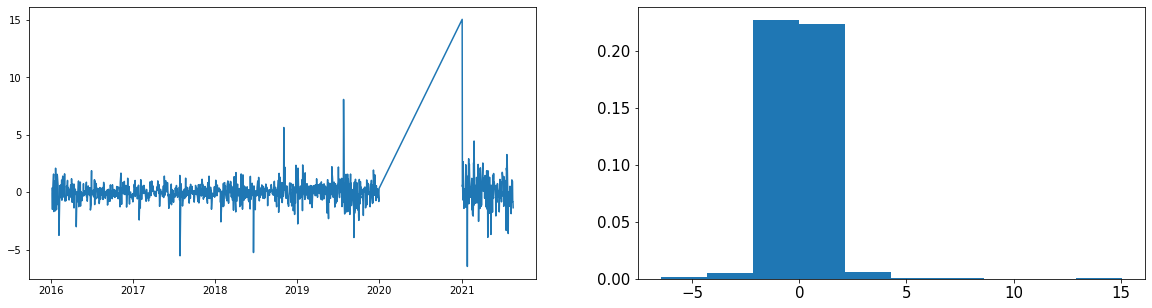

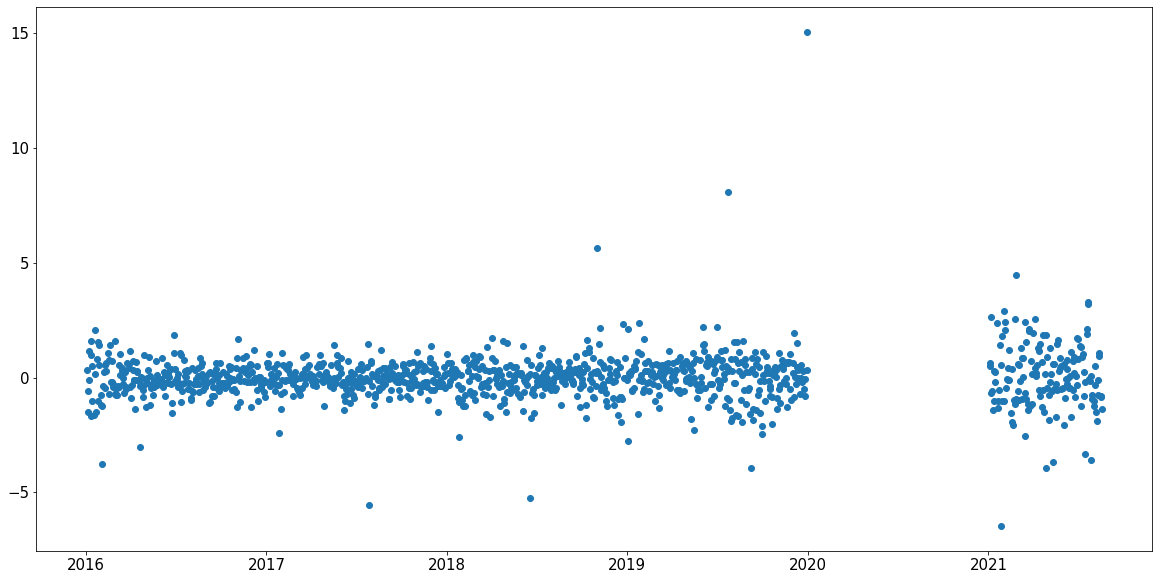

In [69]:
residual =pd.DataFrame(result_final.resid)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))


ax1.plot(residual)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2.hist(residual,density=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


fig, ax = plt.subplots(figsize=(20, 10))
x=data_sbux_train_final[:len(data_sbux_train_final)-1]
print(x)
print(len(residual))
plt.scatter(x.index,residual)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Predicting the next year 

In [70]:
model_final=ARIMA(data_sbux, order=(2,1,3))
result_final=model_final.fit()

index_predf=pd.date_range(start='2021-12-6',end='2022-12-6')
print(len(index_predf))

predf=result_final.predict(start=len(data_sbux),end=len(data_sbux)+365,typ='levels').rename('ARIMA Predection')
predf.index=index_predf
print(predf)

366
2021-12-06    113.218846
2021-12-07    113.347998
2021-12-08    113.221955
2021-12-09    113.261808
2021-12-10    113.240961
                 ...    
2022-12-02    128.931877
2022-12-03    128.976103
2022-12-04    129.020329
2022-12-05    129.064555
2022-12-06    129.108781
Freq: D, Name: ARIMA Predection, Length: 366, dtype: float64


(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

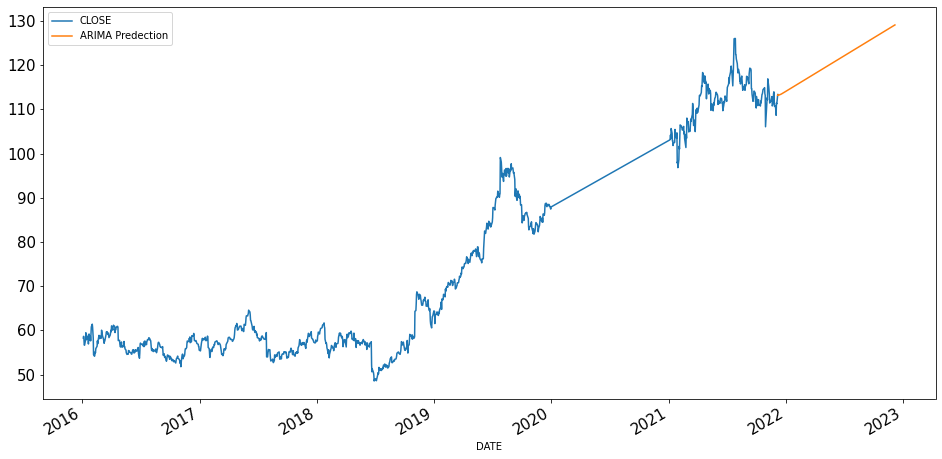

In [71]:
N=16
M=8
fig, ax = plt.subplots(figsize=(N, M))
data_sbux.CLOSE.plot(legend=True)
predf.plot(legend=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

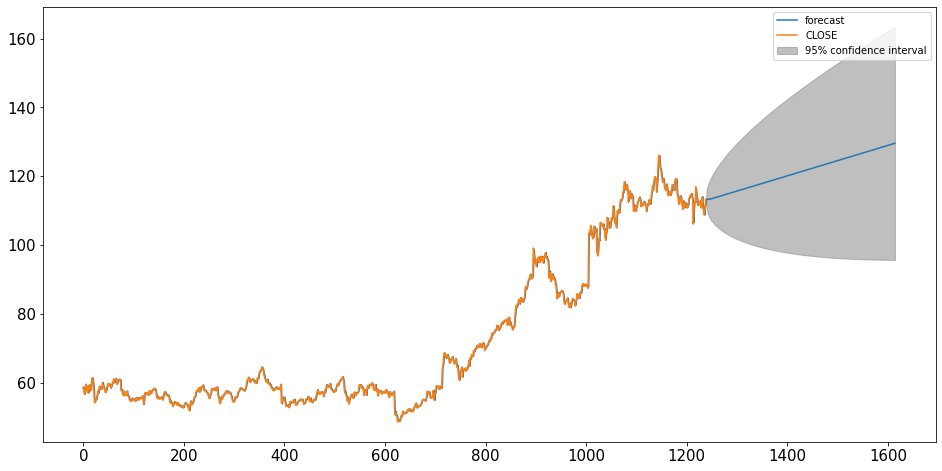

In [72]:
N=16
M=8
fig, ax = plt.subplots(figsize=(N, M))
result_final.plot_predict(start=1,end=1615,dynamic=False, ax =ax);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)